# Basic of Limits and Continuity

## Limit of a Function and Limit Laws

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sympy

In [4]:
## This is OOP style
class LimitGraph:
    def __init__(self, func, hole_x=None, x_range=(0, 10), label=None):
        self.func = func
        self.hole_x = hole_x
        self.x_range = x_range
        self.label = label if label else "f(x)"

    def plot(self):
        x = np.linspace(self.x_range[0], self.x_range[1], 400)
        if self.hole_x is not None:
            x = x[x != self.hole_x]

        y = self.func(x)

        plt.plot(x, y, label=self.label, color='dodgerblue')
        
        if self.hole_x is not None:
            y_hole = self.func(self.hole_x)
            plt.scatter(self.hole_x, y_hole, color='white', edgecolors='black',
                        zorder=5, s=100, label=f'hole at x = {self.hole_x}')

        plt.axvline(self.hole_x, color='gray', linestyle='--', alpha=0.5)
        plt.axhline(self.func(self.hole_x), color='gray', linestyle='--', alpha=0.5)
        plt.title(f"Graph of {self.label}")
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.legend()
        plt.grid(True)
        plt.show()

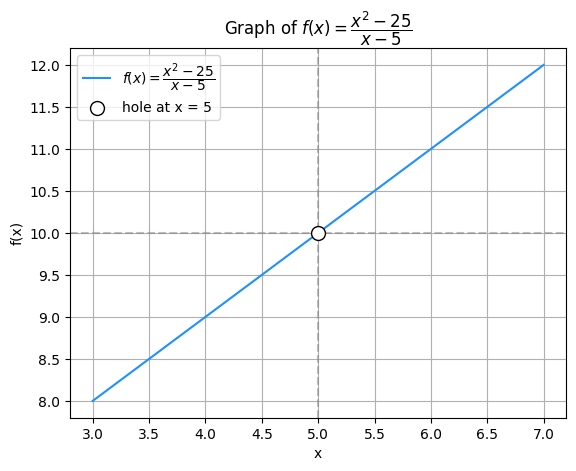

In [5]:
def fx(x):
    return x + 5
g = LimitGraph(func=fx, hole_x=5, x_range=(3, 7),label=r"$f(x) = \dfrac{x^2 - 25}{x - 5}$")
g.plot()

Although the function is not defined at $x = 5$, we can still find the limit as $x$ approaches $5$.
when we simplify the expression, we get $f(x)=x+5$ for all $x != 5$
So as $x$ gets closer and closer to 5 from both sides, $f(x)$ gets closer to 10. 
$$\lim_{x \to 5}\frac{x^2-25}{x-5} = 10$$


In [6]:
data = {
    "x (→ 5⁻)": [4.9, 4.99, 4.999, 4.9999],
    "f(x) (Left)": [9.9, 9.99, 9.999, 9.9999],
    "x (→ 5⁺)": [5.1, 5.01, 5.001, 5.0001],
    "f(x) (Right)": [10.1, 10.01, 10.001, 10.0001]
}

df = pd.DataFrame(data)
df

,x (→ 5⁻),f(x) (Left),x (→ 5⁺),f(x) (Right)
0,4.9000,9.9000,5.1000,10.1000
1,4.9900,9.9900,5.0100,10.0100
2,4.9990,9.9990,5.0010,10.0010
3,4.9999,9.9999,5.0001,10.0001


### Limit Laws
1. **Limit of a Constant:**  
   $\lim_{x \to c} k = k$

2. **Limit of a Linear Function:**  
   $\lim_{x \to c} x = c$

3. **Scalar Multiple Law:**  
   $\lim_{x \to c} [k \cdot f(x)] = k \cdot \lim_{x \to c} f(x)$

4. **Sum Law:**  
   $\lim_{x \to c} [f(x) + g(x)] = \lim_{x \to c} f(x) + \lim_{x \to c} g(x)$

5. **Difference Law:**  
   $\lim_{x \to c} [f(x) - g(x)] = \lim_{x \to c} f(x) - \lim_{x \to c} g(x)$

6. **Product Law:**  
   $\lim_{x \to c} [f(x) \cdot g(x)] = \lim_{x \to c} f(x) \cdot \lim_{x \to c} g(x)$

7. **Quotient Law:**  
   $\lim_{x \to c} \frac{f(x)}{g(x)} = \frac{\lim_{x \to c} f(x)}{\lim_{x \to c} g(x)}$,  
   where $\lim_{x \to c} g(x) \ne 0$


Polynomial Equation
The polynomial equation is $f(x) = 6x^2+4x^2+9$

**Example**

$
\
\begin{aligned}
\lim_{x \to c} \left(6x^3 + 4x^2 + 9\right) 
&= \lim_{x \to c} 6x^3 + \lim_{x \to c} 4x^2 + \lim_{x \to c} 9 \\
&= 6\cdot \lim_{x \to c}x^3 + 4 \cdot \lim_{x \to c} x^2 + \lim_{x \to c} 9 \\
&= 6c^3 + 4c^2 + 9 \\
\end{aligned}
\
$

*Another version*


$
\
\begin{aligned}
\lim_{x \to 5} \left(6x^3 + 4x^2 + 9\right) 
&= \lim_{x \to 5} 6x^3 + \lim_{x \to 5} 4x^2 + \lim_{x \to 5} 9 \\
&= 6\cdot \lim_{x \to 5}x^3 + 4 \cdot \lim_{x \to 5} x^2 + \lim_{x \to 5} 9 \\
&= 6(5)^3 + 4(5)^2 + 9 \\
&= 750 + 100 + 9 \\
&= 859
\end{aligned}
\
$

In [7]:
# Using SymPy
from sympy import symbols, limit

x = symbols('x')
expr = 6*x**3 + 4*x**2 + 9
result = limit(expr, x, 5)
print(f"The result of from SymPy version {result}\n")

# From Scratch
def fx(x):
    return 6*x**3 + 4*x**2 + 9

x = 5
y = fx(x)
print(f"The result of from scratch version {y}\n")

The result of from SymPy version 859

The result of from scratch version 859



### Limit of Polynomials
Let $a_i, n, x \in \mathbb{R}$ and define the polynomial function:
$$P(x) = a_{n}x^n + a_{n-1}x^{n-1} + \dots +a_1x+ a_0$$, then:
$$
\lim_{x \to c}P(x) = P(c) = a_{n}c^n + a_{n-1}c^{n-1} + \dots +a_1x + a_{0}
$$

### Limit of Rational Function
If $P(x)$ and $Q(x)$ are polynomials and $Q(c) \neq 0 $, then :
$$
\lim_{x \to c}\frac{P(x)}{Q(x)} = \frac{P(c)}{Q(c)}
$$

### Squeeze Theorem (a.k.a. Sandwich Theorem)

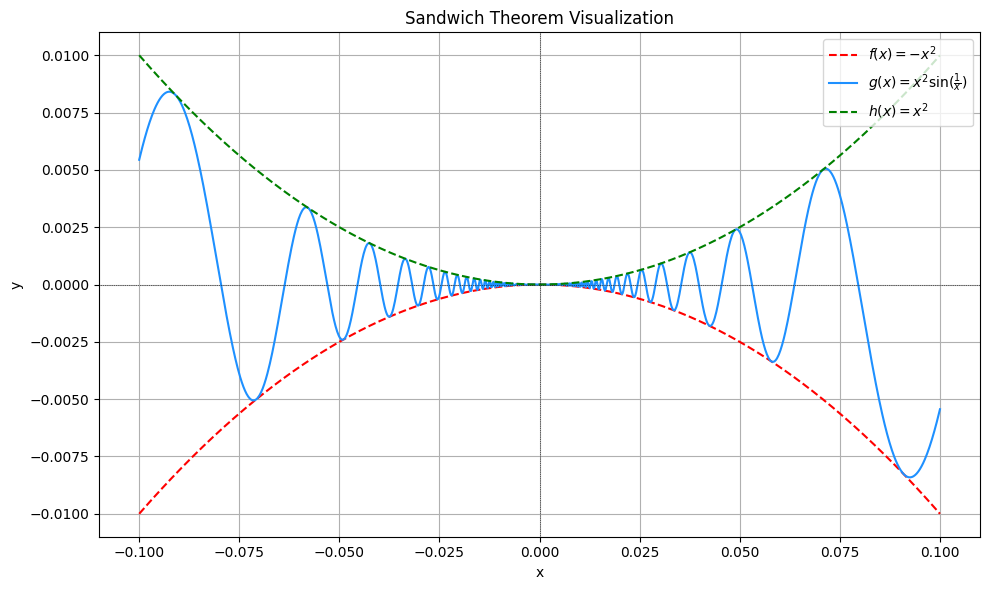

In [8]:
x = np.linspace(-0.1, 0.1, 1000)
x = x[x != 0]

# Define the functions
f = -x**2
g = x**2 * np.sin(1/x)
h = x**2

plt.figure(figsize=(10, 6))
plt.plot(x, f, label=r'$f(x) = -x^2$', color='red', linestyle='--')
plt.plot(x, g, label=r'$g(x) = x^2 \sin(\frac{1}{x})$', color='dodgerblue')
plt.plot(x, h, label=r'$h(x) = x^2$', color='green', linestyle='--')

plt.axhline(0, color='black', linewidth=0.5, linestyle=':')
plt.axvline(0, color='black', linewidth=0.5, linestyle=':')

plt.title("Sandwich Theorem Visualization")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="upper right")
plt.grid(True)
plt.tight_layout()
plt.show()

If we have functions \( f(x), g(x), h(x) \) and there's a range of \( x \) around \( c \) such that:

$$
f(x) \leq g(x) \leq h(x)
$$

and:

$$
\lim_{x \to c} f(x) = \lim_{x \to c} h(x) = L
$$

Then we can conclude:

$$
\lim_{x \to c} g(x) = L
$$

This theorem is useful when a function is hard to evaluate directly, but it's squeezed between two others whose limits are easy to find.

If you're into deeper math, you can find formal proofs of this theorem in **Real Analysis** or **Functional Analysis** texts.


*Example of Sandwich theorem use case*

Proof that 
$$\lim_{x \to 0}\frac{sin(x)}{x} = 1$$

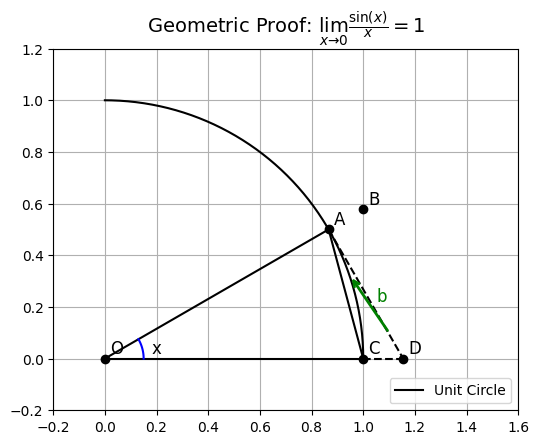

In [9]:
def point_on_circle(angle):
    return np.cos(angle), np.sin(angle)

x_angle = np.pi / 6

O = (0, 0)
A = point_on_circle(x_angle)
C = (1, 0)
B = (1, np.tan(x_angle))
D = (1 / np.cos(x_angle), 0)


fig, ax = plt.subplots(figsize=(6, 6))
ax.set_aspect('equal')

theta = np.linspace(0, np.pi/2, 300)
x = np.cos(theta)
y = np.sin(theta)
ax.plot(x, y, 'k', label='Unit Circle')

# ax.fill([O[0], C[0], A[0]], [O[1], C[1], A[1]], color='skyblue', label='Triangle OAC')
# ax.fill([A[0], B[0], C[0]], [A[1], B[1], C[1]], color='purple', alpha=0.6, label='Sector/Thin Slice')
# ax.fill([A[0], C[0], D[0]], [A[1], C[1], D[1]], color='lightgreen', alpha=0.6, label='Triangle ACD')


ax.plot([O[0], C[0]], [O[1], C[1]], 'k-')
ax.plot([O[0], A[0]], [O[1], A[1]], 'k-')
ax.plot([A[0], C[0]], [A[1], C[1]], 'k-')
ax.plot([A[0], D[0]], [A[1], D[1]], 'k--')
ax.plot([C[0], D[0]], [C[1], D[1]], 'k--')


arc = np.linspace(0, x_angle, 100)
ax.plot(0.15 * np.cos(arc), 0.15 * np.sin(arc), 'blue')
ax.text(0.18, 0.02, 'x', fontsize=12)
ax.annotate('', xy=(0.95, 0.32), xytext=(1.1, 0.1),
            arrowprops=dict(arrowstyle='->', color='green', lw=2))
ax.text(1.05, 0.22, 'b', color='green', fontsize=12)
points = {'O': O, 'A': A, 'B': B, 'C': C, 'D': D}
for label, (x, y) in points.items():
    ax.plot(x, y, 'ko')
    ax.text(x + 0.02, y + 0.02, label, fontsize=12)

ax.set_xlim(-0.2, 1.6)
ax.set_ylim(-0.2, 1.2)
plt.grid(True)
plt.title(r"Geometric Proof: $\lim_{x \to 0} \frac{\sin(x)}{x} = 1$", fontsize=14)
plt.legend(loc='lower right')
plt.show()

#### Proof: $\lim_{x \to 0} \frac{\sin(x)}{x} = 1$

##### Instruction
Use geometry or inequalities.  
For $x \in (0, \frac{\pi}{2})$, we have the following inequality:

$$
\cos(x) \leq \frac{\sin(x)}{x} \leq 1
$$

##### Geometric Idea

Consider a unit circle (radius = 1), and angle $x$ (in radians), with $x \in (0, \frac{\pi}{2})$. We can compare the following **three areas**:

1. **Area of triangle $OAC$** (formed by radius and vertical):
   $$
   \text{Area}_{\triangle OAC} = \frac{1}{2} \sin(x)
   $$

2. **Area of sector $OAC$** (circular slice):
   $$
   \text{Area}_{\text{sector}} = \frac{1}{2} x
   $$

3. **Area of triangle $OAD$** (formed by tangent line):
   $$
   \text{Area}_{\triangle OAD} = \frac{1}{2} \tan(x)
   $$

So we get the inequality from comparing areas:

$$
\sin(x) < x < \tan(x)
$$

##### Derive the Squeeze

Divide all sides by $\sin(x)$ (positive for $x \in (0, \frac{\pi}{2})$):

$$
1 < \frac{x}{\sin(x)} < \frac{1}{\cos(x)}
$$

Take reciprocals (reverse inequalities):

$$
\cos(x) < \frac{\sin(x)}{x} < 1
$$

##### Apply the Squeeze Theorem

As $x \to 0^+$:

- $\lim_{x \to 0^+} \cos(x) = 1$
- $\lim_{x \to 0^+} 1 = 1$

So by the **Sandwich Theorem**:

$$
\lim_{x \to 0^+} \frac{\sin(x)}{x} = 1
$$

Since $\frac{\sin(x)}{x}$ is an **even function** (i.e., symmetric around $x=0$), the same holds for the left-hand limit:

$$
\lim_{x \to 0^-} \frac{\sin(x)}{x} = 1
$$

##### Final Result

$$
{\lim_{x \to 0} \frac{\sin(x)}{x} = 1}
$$


In [10]:
# It have same result if we using SymPy
x = sympy.Symbol('x')
expr = sympy.sin(x) / x
limit_result = sympy.limit(expr, x, 0)
print(limit_result)

1


## Formal Definition of a Limit

In mathematics — especially in **Analysis** — precision is essential. To fully and rigorously define the concept of a limit, we must go beyond intuition and introduce a formal logical framework. This leads us to the **Delta-Epsilon** definition of a limit.

### The Delta-Epsilon Definition

Let $f(x)$ be defined on an open interval about $c$, except possibly at $c$ itself. We say that the limit of $f(x)$ as $x$ approaches $c$ is the number $L$, and write

$$
\lim_{x \to c} f(x) = L
$$

if, for every number $\epsilon > 0$, there exists a corresponding number $\delta > 0$ such that

$|f(x) - L| < \epsilon \quad \text{whenever} \quad 0 < |x - c| < \delta$.

---

The **Delta-Epsilon** definition is a more precise way to define limits, moving past the informal ideas of "getting closer and closer" to a value. This formal framework is essential for proving theorems in advanced mathematics.

*example*
$$\lim_{x \to 3}(2x-1) = 5$$

#### 1. Function Definition

In [11]:
def f(x):
    return 2*x - 1

#### 2. Key Parameters

In [12]:
x0 = 3          # Point of interest
L = f(x0)       # Limit value = 5
epsilon = 1.5   # Tolerance around L
delta = epsilon / 2  # Tolerance around x0 = 0.75

#### 3. Colored Regions

##### Red Shaded Area (ε-band)
- **Horizontal band** between y = L - ε and y = L + ε
- Range: y ∈ [3.5, 6.5]
- Represents acceptable values of f(x) within ε tolerance

##### Green Shaded Area (δ-band)  
- **Vertical band** between x = x₀ - δ and x = x₀ + δ
- Range: x ∈ [2.25, 3.75]
- Represents acceptable values of x within δ tolerance

##### Yellow Shaded Area (Valid Region)
- **Intersection** of red and green bands
- Shows the region where both conditions are satisfied
- Proves that when x is within δ of x₀, f(x) is within ε of L

#### 4. Key Visual Elements

##### Points
- **Black dot (3, 5)**: The limit point (x₀, L)
- **Red dot (0, 0)**: Origin for reference

##### Lines
- **Blue solid line**: The function f(x) = 2x - 1
- **Red dashed lines**: ε boundaries at y = 3.5 and y = 6.5
- **Green dashed lines**: δ boundaries at x = 2.25 and x = 3.75
- **Gray lines**: Reference axes through the limit point

##### Customization Options
- **Change ε value**: Modify `epsilon = 1.5` to see different tolerance levels
- **Adjust δ calculation**: Currently δ = ε/2, but you can use different relationships
- **Modify function**: Change `def f(x)` to visualize other functions
- **Adjust plot range**: Modify `xlim()` and `ylim()` for different viewing windows

#### Mathematical Verification
For $f(x) = 2x - 1$ with $\epsilon = 1.5$:

1. **Given**: $|x - 3| < \delta = 0.75$
2. **Then**: 
   $
   |f(x) - 5| = |(2x - 1) - 5| = |2x - 6| = 2|x - 3|
   $
3. **Since** $|x - 3| < 0.75$, we have:
   $
   2|x - 3| < 2(0.75) = 1.5 = \epsilon
   $
4. **Therefore**: $|f(x) - 5| < \epsilon$ ✓

This confirms that for every $\epsilon > 0$, we can find $\delta = \frac{\epsilon}{2}$ such that  
if $0 < |x - 3| < \delta$, then $|f(x) - 5| < \epsilon$.

**Thus, by the Delta-Epsilon definition of a limit**:
$
\lim_{x \to 3} (2x - 1) = 5 \quad \blacksquare
$



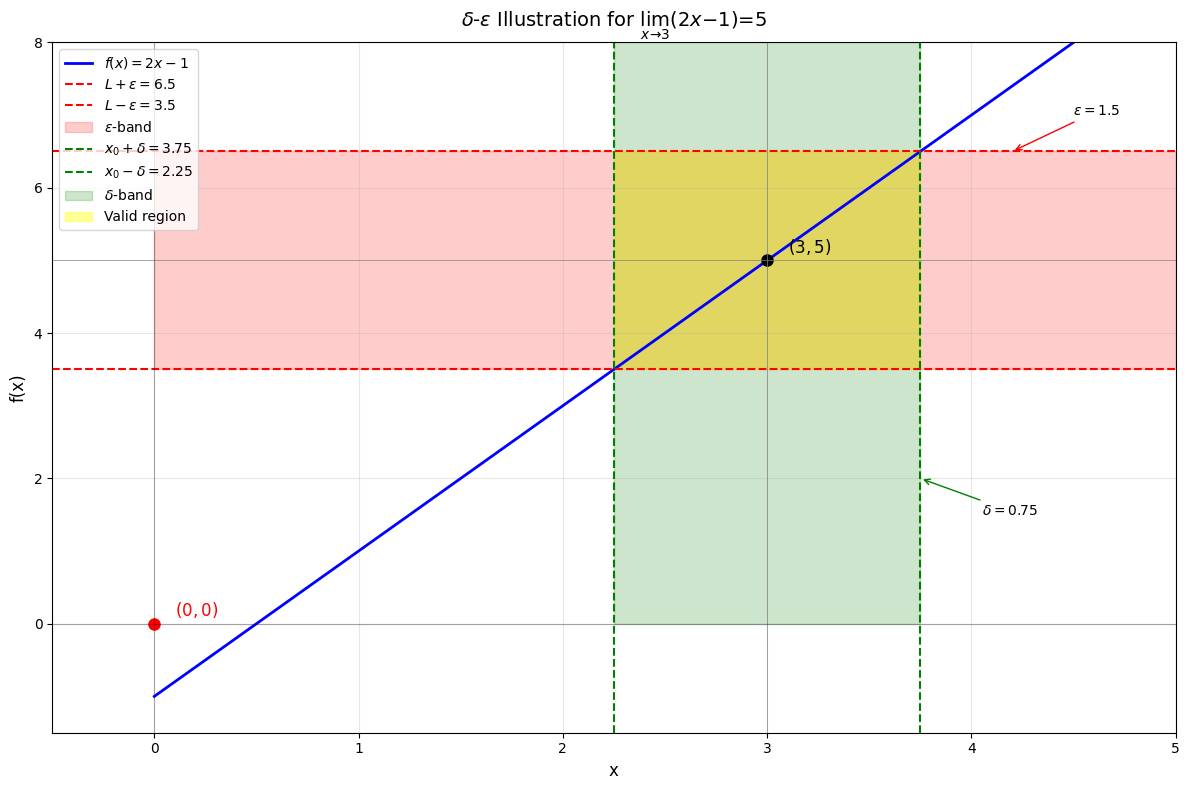

In [13]:
# Range of x
x = np.linspace(0, 5, 400)
y = f(x)

# Plot setup
plt.figure(figsize=(12, 8))
plt.plot(x, y, label=r'$f(x) = 2x - 1$', color='blue', linewidth=2)

# Horizontal ε-band
plt.axhline(L + epsilon, color='red', linestyle='--', label=fr'$L + \epsilon = {L + epsilon}$')
plt.axhline(L - epsilon, color='red', linestyle='--', label=fr'$L - \epsilon = {L - epsilon}$')
plt.fill_between(x, L - epsilon, L + epsilon, color='red', alpha=0.2, label=r'$\epsilon$-band')

# Vertical δ-band
y_fill = np.linspace(0, 8, 100)
plt.axvline(x0 + delta, color='green', linestyle='--', label=fr'$x_0 + \delta = {x0 + delta}$')
plt.axvline(x0 - delta, color='green', linestyle='--', label=fr'$x_0 - \delta = {x0 - delta}$')
plt.fill_betweenx(y_fill, x0 - delta, x0 + delta, color='green', alpha=0.2, label=r'$\delta$-band')

# Intersection (valid region)
x_inter = np.linspace(x0 - delta, x0 + delta, 100)
plt.fill_between(x_inter, L - epsilon, L + epsilon, color='yellow', alpha=0.4, label='Valid region')

# Key points
plt.plot(x0, L, 'ko', markersize=8)
plt.text(x0 + 0.1, L + 0.1, r'$(3, 5)$', fontsize=12)

plt.plot(0, 0, 'ro', markersize=8)
plt.text(0.1, 0.1, r'$(0, 0)$', fontsize=12, color='red')

# Axes and grid
plt.axhline(L, color='gray', linewidth=0.5)
plt.axvline(x0, color='gray', linewidth=0.5)
plt.axhline(0, color='black', linewidth=0.8, alpha=0.3)
plt.axvline(0, color='black', linewidth=0.8, alpha=0.3)

# Annotations
plt.annotate(r'$\epsilon = 1.5$', xy=(4.2, L + epsilon), xytext=(4.5, L + epsilon + 0.5),
             arrowprops=dict(arrowstyle='->', color='red'), fontsize=10)

plt.annotate(r'$\delta = 0.75$', xy=(x0 + delta, 2), xytext=(x0 + delta + 0.3, 1.5),
             arrowprops=dict(arrowstyle='->', color='green'), fontsize=10)

# Labels and layout
plt.title(r'$\delta$-$\epsilon$ Illustration for $\lim_{x \to 3}(2x - 1) = 5$', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.xlim(-0.5, 5)
plt.ylim(-1.5, 8)
plt.grid(True, alpha=0.3)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## One-Side Limit and Continuity

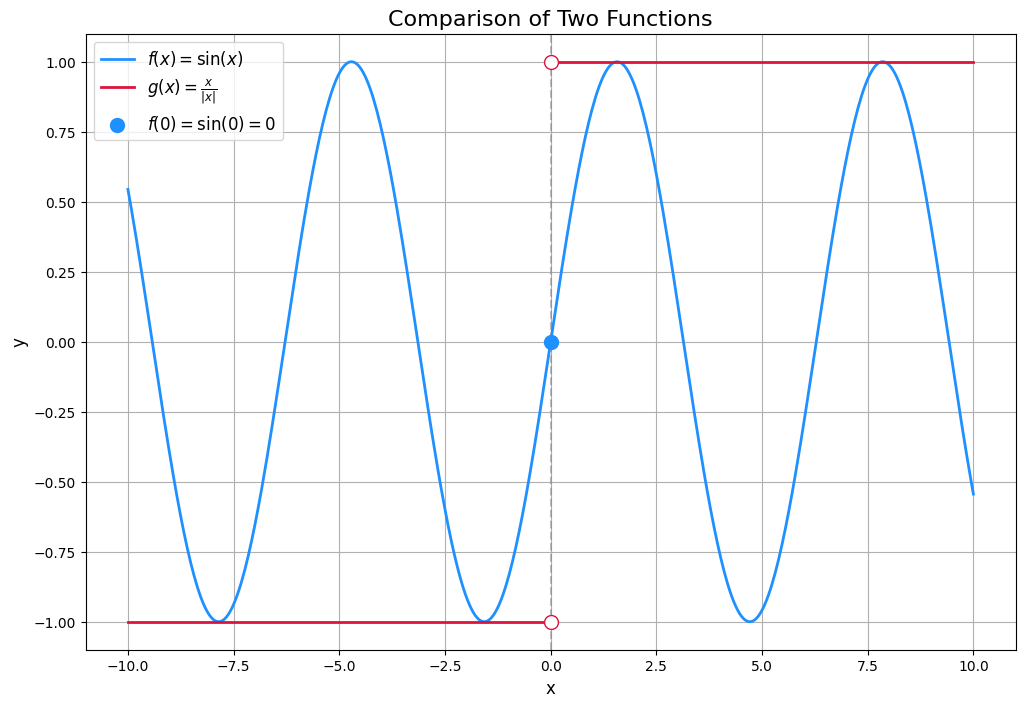

In [14]:
# 1. Define the functions
def f1(x):
    """Function 1: A continuous sine wave"""
    return np.sin(x)

def f2(x):
    """Function 2: A discontinuous step function"""
    # Using np.sign for a more robust and direct implementation of x/|x|
    # np.sign(0) returns 0, so we still need to handle the discontinuity by plotting segments.
    return np.sign(x)

# 2. Set up the x-values for plotting
# For the sine wave, we can use a single continuous range
x_f1 = np.linspace(-10, 10, 500) # Increased points for smoother sine wave

# For the step function, we need to handle the discontinuity at x=0
# We create two separate ranges to avoid calculating at x=0
x_f2_neg = np.linspace(-10, -0.001, 200) # Go very close to 0
x_f2_pos = np.linspace(0.001, 10, 200)   # Start very close to 0

# 3. Calculate the y-values
y_f1 = f1(x_f1)
y_f2_neg = f2(x_f2_neg)
y_f2_pos = f2(x_f2_pos)

# 4. Create the plot
plt.figure(figsize=(12, 8))

# Plot the continuous sine function
plt.plot(x_f1, y_f1, color='dodgerblue', linewidth=2, label=r'$f(x) = \sin(x)$')

# Plot the discontinuous step function
plt.plot(x_f2_neg, y_f2_neg, color='crimson', linewidth=2, label=r'$g(x) = \frac{x}{|x|}$')
plt.plot(x_f2_pos, y_f2_pos, color='crimson', linewidth=2)

# Add open circles to show the discontinuity of the step function at x=0
# These indicate the function approaches these values but is not defined at x=0
plt.scatter(0, 1, color='crimson', s=100, facecolors='white', zorder=5, edgecolors='crimson')
plt.scatter(0, -1, color='crimson', s=100, facecolors='white', zorder=5, edgecolors='crimson')

# Add a closed circle to explicitly show the continuity of the sine function at x=0
# f1(0) = sin(0) = 0. This point is part of the continuous function.
plt.scatter(0, 0, color='dodgerblue', s=100, zorder=5, label=r'$f(0) = \sin(0) = 0$')


# Add a vertical dashed line to highlight x=0
plt.axvline(0, color='gray', linestyle='--', alpha=0.5)

# Set plot title, labels, and legend
plt.title('Comparison of Two Functions', fontsize=16)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

From the graphs of both functions, $f(x) = \sin(x)$ and $g(x) = \frac{x}{|x|}$, we can observe their behavior as $x$ approaches 0.
* For the function $f(x) = \sin(x)$, the limit from the left and the limit from the right are **equal**. As $x$ approaches 0 from both sides, the value of the function approaches a single point:
    $$\lim_{x \to 0^-} f(x) = \lim_{x \to 0^+} f(x) = 0$$
    This demonstrates that $f(x)$ is **continuous** at $x=0$.

* For the function $g(x) = \frac{x}{|x|}$, the limit from the left and the limit from the right are **not equal**. As $x$ approaches 0 from the left, the value is $-1$. As $x$ approaches 0 from the right, the value is $1$:
    $$\lim_{x \to 0^-} g(x) = -1 \quad \text{and} \quad \lim_{x \to 0^+} g(x) = 1$$
    Because the left and right limits are different, the overall limit does not exist, and the function is **discontinuous** at $x=0$.

We also can we the numerical table using DataFrame of Pandas like this

In [15]:
def f(x):
    return np.sin(x)
    
x_left = np.array([-0.1, -0.01, -0.001, -0.0001])
x_right = np.array([0.1, 0.01, 0.001, 0.0001])

data_f = {
    "x (→ 0⁻)": x_left,
    "f(x) (Left)": f(x_left),
    "x (→ 0⁺)": x_right,
    "f(x) (Right)": f(x_right)
}
df_f = pd.DataFrame(data_f)
df_f

,x (→ 0⁻),f(x) (Left),x (→ 0⁺),f(x) (Right)
0,-0.1000,-0.099833,0.1000,0.099833
1,-0.0100,-0.010000,0.0100,0.010000
2,-0.0010,-0.001000,0.0010,0.001000
3,-0.0001,-0.000100,0.0001,0.000100


In [16]:
def g(x):
    return x / np.abs(x)
    
x_left = np.array([-0.1, -0.01, -0.001, -0.0001])
x_right = np.array([0.1, 0.01, 0.001, 0.0001])

data_g = {
    "x (→ 0⁻)": x_left,
    "g(x) (Left)": g(x_left),
    "x (→ 0⁺)": x_right,
    "g(x) (Right)": g(x_right)
}
df_g = pd.DataFrame(data_g)
df_g

,x (→ 0⁻),g(x) (Left),x (→ 0⁺),g(x) (Right)
0,-0.1000,-1.0,0.1000,1.0
1,-0.0100,-1.0,0.0100,1.0
2,-0.0010,-1.0,0.0010,1.0
3,-0.0001,-1.0,0.0001,1.0


### Conditions for the Existence of a Limit

For the limit of a function \( f(x) \) to exist as \( x \) approaches a number \( c \), the following three conditions must be satisfied:
We say the limit exists and equals \( L \) if and only if:
$$
\lim_{x \to c} f(x) = L 
\quad \Longleftrightarrow \quad 
\lim_{x \to c^-} f(x) = L 
\quad \text{and} \quad 
\lim_{x \to c^+} f(x) = L
$$


### **Right-Hand Limit**

Imagine you're walking along the graph of a function $f(x)$, moving toward a specific x-value $c$ **from the right side** (i.e., where $ x > c $).

We say the **right-hand limit** of $f(x)$ as $x \to c^+$ is $L$ if, no matter how closely someone challenges you to get to the y-value $ L$ (within a tiny distance $\epsilon$), you can always respond by choosing a small distance $\delta$, such that:

> Whenever $x$ is **within $\delta$ units to the right of $c$**, the function values $f(x)$ stay within $\epsilon$ units of $L$.

Formally, this means:

$$\lim_{x \to c^+} f(x) = L \quad \text{if and only if} \quad \forall \epsilon > 0, \, \exists \delta > 0 \text{ such that } 0 < x - c < \delta \Rightarrow |f(x) - L| < \epsilon$$

---

### **Left-Hand Limit**

Imagine you're walking along the graph of a function $f(x)$, moving toward a specific x-value $c$ **from the left side** (i.e., where $x < c$).

We say the **left-hand limit** of $f(x)$ as $x \to c^-$ is $L$ if, no matter how closely someone challenges you to get to the y-value $L$ (within a tiny distance $\epsilon$), you can always respond by choosing a small distance $\delta$, such that:

> Whenever $x$ is **within $\delta$ units to the left of $c$**, the function values $f(x)$ stay within $\epsilon$ units of $L$.

Formally, this means:

$$\lim_{x \to c^-} f(x) = L \quad \text{if and only if} \quad \forall \epsilon > 0, \, \exists \delta > 0 \text{ such that } 0 < c - x < \delta \Rightarrow |f(x) - L| < \epsilon$$

### **Continuity at a Point**

Let $c$ be a real number that is either an interior point or an endpoint of an interval in the domain of $f$.

- The function $f$ is **continuous at $c$** if:

$$
\lim_{x \to c} f(x) = f(c)
$$

- The function $f$ is **right-continuous at $c$** (or **continuous from the right**) if:

$$
\lim_{x \to c^+} f(x) = f(c)
$$

- The function $f$ is **left-continuous at $c$** (or **continuous from the left**) if:

$$
\lim_{x \to c^-} f(x) = f(c)
$$


### **Properties of Continuous Functions**

If the functions $f$ and $g$ are continuous at $x = c$, then the following algebraic combinations are also continuous at $x = c$:

1.  **Sum:** The sum of the functions, $f(x) + g(x)$, is continuous at $x=c$.
2.  **Difference:** The difference of the functions, $f(x) - g(x)$, is continuous at $x=c$.
3.  **Product:** The product of the functions, $f(x) \cdot g(x)$, is continuous at $x=c$.
4.  **Quotient:** The quotient of the functions, $\frac{f(x)}{g(x)}$, is continuous at $x=c$, provided that $g(c) \neq 0$.
5.  **Constant Multiple:** The constant multiple of a function, $k \cdot f(x)$, is continuous at $x=c$ for any real number $k$.
6.  **Power:** The function $f(x)^n$ is continuous at $x=c$ for any positive integer $n$.
7.  **Root:** The function $\sqrt[n]{f(x)}$ is continuous at $x=c$ provided that the root is defined (for even roots, $f(c) > 0$).

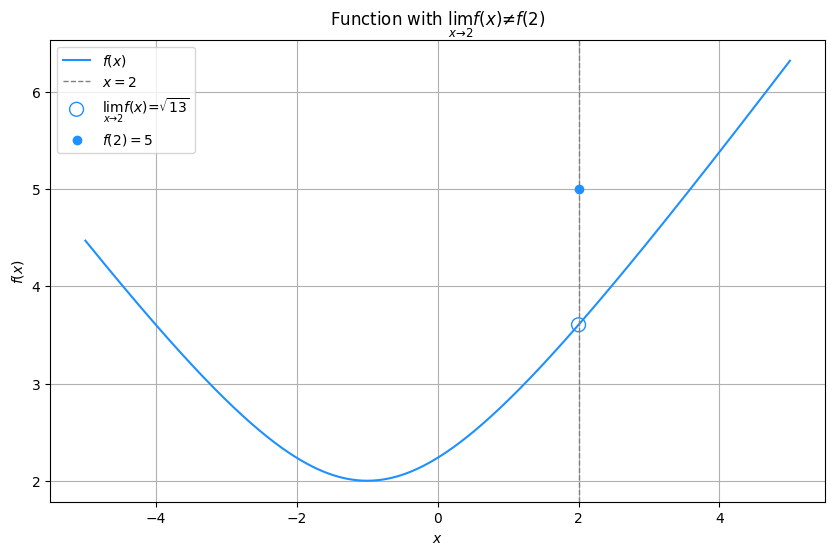

In [46]:
def f(x):
    return np.where(x == 2, 5, np.sqrt(x**2 + 2*x + 5))

x = np.linspace(-5, 5, 1000)
y = f(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label=r'$f(x)$', color='dodgerblue')
plt.axvline(2, color='gray', linestyle='--', linewidth=1, label=r'$x = 2$')

plt.scatter(2, np.sqrt(13), facecolors='none', edgecolors='dodgerblue', s=100, label=r'$\lim_{x \to 2} f(x) = \sqrt{13}$')
plt.scatter(2, 5, color='dodgerblue', label=r'$f(2) = 5$', zorder=5)

plt.title(r'Function with $\lim_{x \to 2} f(x) \ne f(2)$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.grid(True)
plt.show()

### Analysis of Discontinuity of the Function \( f(x) \) at \( x = 2 \)

Consider the function defined as:

$$
f(x) =
\begin{cases}
\sqrt{x^2 + 2x + 5} & \text{if } x \ne 2 \\
5 & \text{if } x = 2
\end{cases}
$$

### Check Left-Hand and Right-Hand Limits

The expression $\sqrt{x^2 + 2x + 5}$ is continuous for all real values of $x$ because the expression inside the square root is strictly positive for all $x \in \mathbb{R}$.

We compute the one-sided limits as $x \to 2$:
$$
\lim_{x \to 2^-} f(x) = \lim_{x \to 2^+} f(x) = \sqrt{2^2 + 2(2) + 5} = \sqrt{13}
$$

Therefore,

$$
\lim_{x \to 2} f(x) = \sqrt{13} \approx 3.6055
$$


### Step 2: Evaluate the Actual Function Value

According to the definition of the piecewise function:

$
f(2) = 5
$

### Step 3: Conclusion on Continuity

The limit $\lim_{x \to 2} f(x)$ exists, but it is **not equal** to $f(2)$. That is,

$$
\lim_{x \to 2} f(x) \ne f(2)
$$

Hence, the function $f(x)$ is **not continuous at $x = 2$**.

This is an example of a **removable discontinuity**, where the limit exists but the function value at the point differs from the limit.
